In [1]:
import os
import numpy as np
import math
from tensorflow.keras import models, layers

In [2]:
XY = np.random.random((1_000_000, 2)).astype(np.float32) * 4.0 - 2.0

Z = np.array([
    1 if y >= -0.5 and 0.5>=x-y and 0.5 >= -x-y and y <= 1 else 0
    for [x, y] in XY], dtype=np.float32)

In [4]:
model = models.Sequential([
    layers.InputLayer(input_shape=(2,)),
    layers.Dense(100, activation='sigmoid', use_bias=True),
    layers.Dense(20, activation='sigmoid', use_bias=True),
    layers.Dense(1, activation='sigmoid', use_bias=False)
])

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics='accuracy'
)

In [5]:

if os.path.isfile("smart_duckling_colab.h5"):
    print("Loading existing synapses...")
    model.load_weights("smart_duckling_colab.h5")
else:
    print("Training the duckling...")
    model.fit(
        XY, Z,
        epochs=100,
        batch_size=1000,
        use_multiprocessing=True,
        verbose=False
    )
    model.save("smart_duckling_colab.h5")

print("Done,", model.evaluate(XY, Z))

Training the duckling...
31250/31250 [==============================] - 32s 1ms/step - loss: 6.8076e-04 - accuracy: 0.9993
Done, [0.0006807617610320449, 0.9993379712104797]


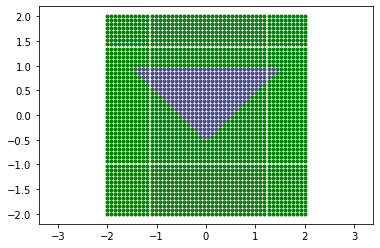

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.axis('equal')

c = np.linspace(-2,2,50)

# https://stackoverflow.com/a/11144716/539470 =)
XY = np.transpose([np.tile(c, len(c)), np.repeat(c, len(c))])

Z = model.predict(XY)

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, c=[(0.3,0.3,0.5)] if z[0] >= 0.5 else 'green', marker='.')

plt.show()

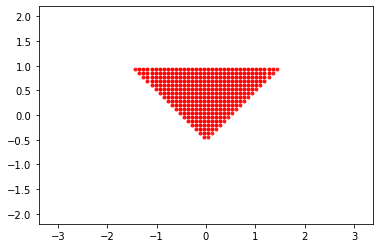

In [7]:
def saturate(v):
    return min(1, max(0, v))

plt.axis('equal')

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, color=[(1, 1-saturate(z[0]), 1-saturate(z[0]))], marker='.')

plt.show()